In [8]:
import pandas as pd

df = pd.read_csv("/content/netflix_titles.csv", encoding='latin1')
import sqlite3

conn = sqlite3.connect(':memory:')
df.to_sql('netflix', conn, index=False)



8807

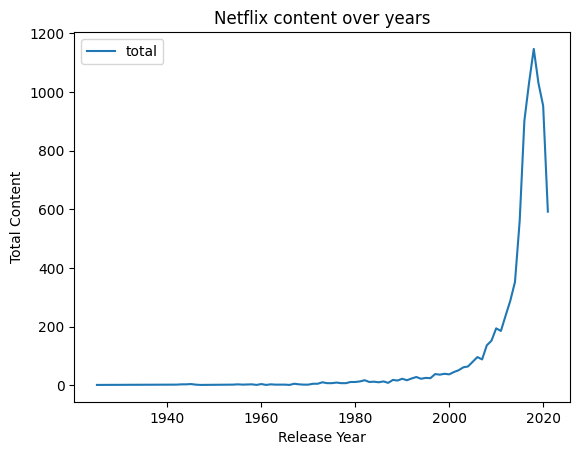

In [11]:
import matplotlib.pyplot as plt

year_data.plot(x='release_year', y='total', kind='line')
plt.title("Netflix content over years")
plt.xlabel("Release Year")
plt.ylabel("Total Content")
plt.show()


In [12]:
queries = {

"type_count": """
SELECT type, COUNT(*) as total
FROM netflix
GROUP BY type
""",

"top_countries": """
SELECT country, COUNT(*) as total
FROM netflix
GROUP BY country
ORDER BY total DESC
LIMIT 5
""",

"release_year_trend": """
SELECT release_year, COUNT(*) as total
FROM netflix
GROUP BY release_year
ORDER BY release_year
""",

"rating_count": """
SELECT rating, COUNT(*) as total
FROM netflix
GROUP BY rating
ORDER BY total DESC
""",

"top_genres": """
SELECT listed_in, COUNT(*) as total
FROM netflix
GROUP BY listed_in
ORDER BY total DESC
LIMIT 5
""",

"year_added_trend": """
SELECT year_added, COUNT(*) as total
FROM netflix
GROUP BY year_added
ORDER BY year_added
""",

"avg_movie_duration": """
SELECT AVG(duration_int) as avg_duration
FROM netflix
WHERE type='Movie'
""",

"longest_movie": """
SELECT title, duration_int
FROM netflix
WHERE type='Movie'
ORDER BY duration_int DESC
LIMIT 1
"""
}


In [13]:
query_keywords = {
    "type_count": ["type", "movies", "tv", "shows", "movies vs tv"],
    "top_countries": ["country", "countries", "top country"],
    "year_trend": ["year", "trend", "year wise", "content per year"]
}


In [14]:
def detect_query(user_input):
    user_input = user_input.lower()

    for query_name, keywords in query_keywords.items():
        for word in keywords:
            if word in user_input:
                return query_name

    return None


In [15]:
def run_query(user_input):
    query_name = detect_query(user_input)

    if query_name is None:
        print("Sorry, I couldn't understand the query.")
        return

    result = pd.read_sql(queries[query_name], conn)
    print("\nTable Output:\n", result)

    if query_name == "year_trend":
        result.plot(x='release_year', y='total', kind='line')
    else:
        result.plot(x=result.columns[0], y='total', kind='bar')

    plt.title(query_name)
    plt.show()


In [17]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
df['year_added'] = df['date_added'].dt.year

df['duration_int'] = df['duration'].str.extract(r'(\d+)')
df['duration_int'] = pd.to_numeric(df['duration_int'], errors='coerce')

df.to_sql('netflix', conn, index=False, if_exists='replace')


8807

In [36]:
def get_movies_after_year(year):
    query = f"""
    SELECT title, release_year
    FROM netflix
    WHERE type='Movie' AND release_year > {year}
    """
    return pd.read_sql(query, conn)
def get_tv_shows_by_country(country):
    query = f"""
    SELECT title, country
    FROM netflix
    WHERE type='TV Show' AND country LIKE '%{country}%'
    """
    return pd.read_sql(query, conn)
def get_type_count():
    return pd.read_sql(queries["type_count"], conn)

def get_top_countries():
    return pd.read_sql(queries["top_countries"], conn)

def get_release_year_trend():
    return pd.read_sql(queries["release_year_trend"], conn)

def get_top_genres():
    return pd.read_sql(queries["top_genres"], conn)
def get_rating_count():
    return pd.read_sql(queries["rating_count"], conn)

In [37]:
query_map = {
    "movies vs tv": get_type_count,
    "type": get_type_count,
    "top countries": get_top_countries,
    "country": get_top_countries,
    "release year": get_release_year_trend,
    "year trend": get_release_year_trend,
    "rating": get_rating_count,
    "top genres": get_top_genres,
    "genre": get_top_genres
}

In [20]:
import re

In [43]:
def run_query(user_input):
    user_input = user_input.lower()

    year_match = re.search(r'\d{4}', user_input)
    if "movies after" in user_input and year_match:
        year = year_match.group()
        result = get_movies_after(year)
        print(result.head())
        return

    for keyword, func in query_map.items():
        if keyword in user_input:
            result = func()
            print(result)

            if 'total' in result.columns:

                x_col = result.columns[0]

                if "year" in x_col.lower():
                    result.plot(x=x_col, y='total', kind='line')

                elif len(result) <= 5:
                    result.set_index(x_col)['total'].plot(kind='pie', autopct='%1.1f%%')
                    plt.ylabel('')

                else:
                    result.plot(x=x_col, y='total', kind='bar')

                plt.title("Analysis Result")
                plt.show()

            return

    print("Query not understood")

Ask your question: rating
      rating  total
0      TV-MA   3207
1      TV-14   2160
2      TV-PG    863
3          R    799
4      PG-13    490
5      TV-Y7    334
6       TV-Y    307
7         PG    287
8       TV-G    220
9         NR     80
10         G     41
11  TV-Y7-FV      6
12      None      4
13        UR      3
14     NC-17      3
15    84 min      1
16    74 min      1
17    66 min      1


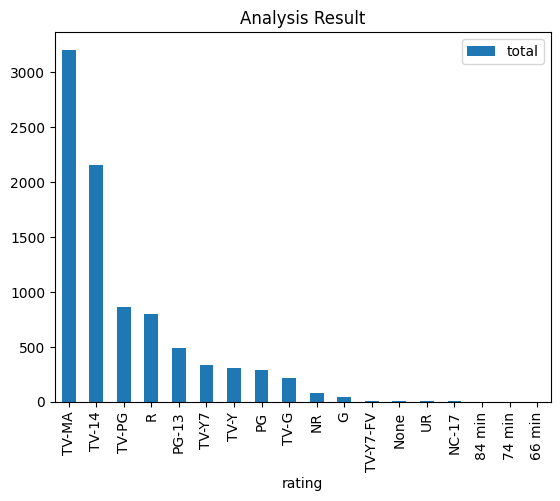

In [44]:
user_input = input("Ask your question: ")
run_query(user_input)
